In [1]:
import os 

os.chdir("/home/theovincent/MVA/3DPointCloud/3DPointCloudClassification")

point_cloud_name = "MiniDijon9"

## Admissible centers

In [2]:
import numpy as np
from classifier_3D.utils.ply_file import read_ply


centers, _ = read_ply(f"data/centers/{point_cloud_name}_centers.ply")

center_points = np.vstack((centers["x"], centers["y"])).T.astype(np.float32)

center_min = center_points.min(axis=0)
min_point_x = center_points[center_points[:, 0] == center_min[0]][0]
min_point_y = center_points[center_points[:, 1] == center_min[1]][0]

center_max = center_points.max(axis=0)
max_point_x = center_points[center_points[:, 0] == center_max[0]][0]
max_point_y = center_points[center_points[:, 1] == center_max[1]][0]

In [3]:
centers_bound = np.vstack((min_point_x, min_point_y, max_point_x, max_point_y))
centers_bound

array([[-52.935486, -22.587769],
       [-49.467407, -28.431564],
       [ 31.811981,  15.159637],
       [ 29.539429,  19.625504]], dtype=float32)

### Visualise center

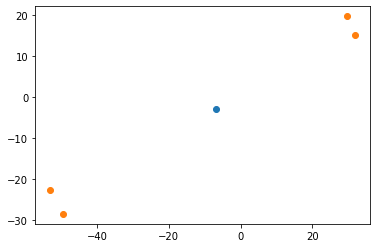

In [4]:
import matplotlib.pyplot as plt

weights = np.random.randint(0, 10, size=4).astype(float)
weights /= weights.sum()

center = np.append(weights @ centers_bound, [0])

plt.scatter(center[0], center[1])
_ = plt.scatter(centers_bound[:, 0], centers_bound[:, 1])

## z ground

-4.729243278503418


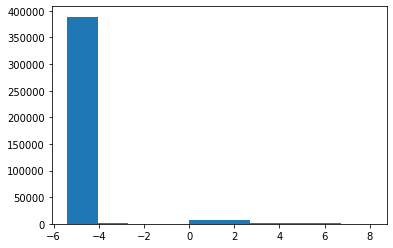

In [5]:
n, bins, _ = plt.hist(centers["z"], bins=10)

z_ground = (bins[np.argmax(n)] + bins[np.argmax(n) + 1]) / 2
print(z_ground)

## Rotations

We need to adapt the code for every dataset

In [6]:
# Take the longest edge that would produce theta in [0, pi]
if np.linalg.norm(max_point_y - min_point_x) > np.linalg.norm(min_point_x - min_point_y):
    angle_point = max_point_y - min_point_x
else:
    angle_point = min_point_x - min_point_y

theta = np.arccos(angle_point[0] / np.linalg.norm(angle_point))
theta

0.4730679

### Visualise the rotation on the center points

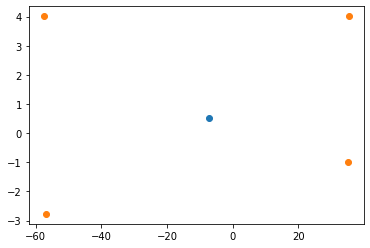

In [7]:
theta = - theta
rotation = np.array([[np.cos(theta), - np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])

rotated_center = center @ rotation.T
rotated_centers_bound = np.hstack((centers_bound, np.ones((centers_bound.shape[0], 1)))) @ rotation.T

plt.scatter(rotated_center[0], rotated_center[1])
_ = plt.scatter(rotated_centers_bound[:, 0], rotated_centers_bound[:, 1])